In [861]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [970]:
data=pd.read_excel('Churn_Case.xlsx','Case Data')

In [863]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
ID                            6347 non-null int64
Customer Age (in months)      6347 non-null int64
Churn (1 = Yes, 0 = No)       6347 non-null int64
CHI Score Month 0             6347 non-null int64
CHI Score 0-1                 6347 non-null int64
Support Cases Month 0         6347 non-null int64
Support Cases 0-1             6347 non-null int64
SP Month 0                    6347 non-null float64
SP 0-1                        6347 non-null float64
Logins 0-1                    6347 non-null int64
Blog Articles 0-1             6347 non-null int64
Views 0-1                     6347 non-null int64
 Days Since Last Login 0-1    6347 non-null int64
dtypes: float64(2), int64(11)
memory usage: 644.7 KB


In [936]:
data.describe()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3174.000000,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932,0.812781,0.030169,15.727903,0.157240,96.310540,1.764613
std,1832.365411,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942,1.320530,1.460336,42.119061,4.660607,3152.411673,17.966020
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1587.500000,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,3174.000000,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4760.500000,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,27.000000,3.000000
max,6347.000000,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


In [971]:
data=data.rename(index=str, columns={'Churn (1 = Yes, 0 = No)':'Churn','Customer Age (in months)':'Customer Age'})

In [972]:
data=data.drop('ID',axis=1)

In [939]:
data.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


# churn

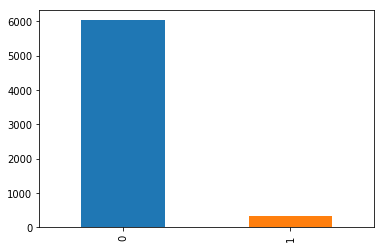

In [940]:
data['Churn'].value_counts().plot(kind='bar')
plt.show()

# Customer Age 

In [869]:
#data[data['Churn']==1]['Customer Age'].value_counts()

### Ass1:Mr. Well (the case protagonist) believes that two important predictors of customer churn are Customer Age (i.e., tenure with QWE) and CHI score. Does your data analysis support these beliefs?

The most important two features:Customer Age (i.e., tenure with QWE) and CHI score

In [941]:
#import lib
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
ExtraTreesClassifier)

#plot
from matplotlib import pyplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Initiate model
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

# split data into X and y
X= data.drop(['Churn'], axis=1)
y=data['Churn']
X_columns=data.drop(['Churn'], axis=1).columns.values


#train model
rf.fit(X,y)
et.fit(X,y)
ada.fit(X,y)
gb.fit(X,y)
xg.fit(X,y)

# Get feature importance
rf_features =rf.feature_importances_
et_features = et.feature_importances_
ada_features = ada.feature_importances_
gb_features = gb.feature_importances_
xg_features=xg.feature_importances_

In [942]:
#Get feature importance 

feature_dataframe = pd.DataFrame( {
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'xg Boost feature importances': xg_features,
     'Gradient Boost feature importances': gb_features,
     'features': X_columns
})


In [943]:
feature_dataframe

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,xg Boost feature importances
0,0.22,0.178487,0.137387,0.186816,Customer Age,0.221298
1,0.20,0.132308,0.178693,0.143211,CHI Score Month 0,0.183028
2,0.14,0.135861,0.178531,0.130601,CHI Score 0-1,0.158070
3,0.02,0.013208,0.000787,0.013369,Support Cases Month 0,0.000000
4,0.06,0.023971,0.032872,0.023203,Support Cases 0-1,0.021631
5,0.00,0.008737,0.008304,0.013738,SP Month 0,0.008319
6,0.00,0.018115,0.002980,0.026536,SP 0-1,0.018303
7,0.10,0.116845,0.095916,0.120609,Logins 0-1,0.079867
8,0.08,0.057378,0.006524,0.047655,Blog Articles 0-1,0.021631
9,0.06,0.175926,0.162041,0.175604,Views 0-1,0.161398


In [944]:
# axis = 1 computes the mean row-wise
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by='mean',ascending=False)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,xg Boost feature importances,mean
0,0.22,0.178487,0.137387,0.186816,Customer Age,0.221298,0.188798
1,0.20,0.132308,0.178693,0.143211,CHI Score Month 0,0.183028,0.167448
2,0.14,0.135861,0.178531,0.130601,CHI Score 0-1,0.158070,0.148613
9,0.06,0.175926,0.162041,0.175604,Views 0-1,0.161398,0.146994
10,0.12,0.139164,0.195963,0.118658,Days Since Last Login 0-1,0.126456,0.140048
7,0.10,0.116845,0.095916,0.120609,Logins 0-1,0.079867,0.102647
8,0.08,0.057378,0.006524,0.047655,Blog Articles 0-1,0.021631,0.042638
4,0.06,0.023971,0.032872,0.023203,Support Cases 0-1,0.021631,0.032335
6,0.00,0.018115,0.002980,0.026536,SP 0-1,0.018303,0.013187
3,0.02,0.013208,0.000787,0.013369,Support Cases Month 0,0.000000,0.009473


In [945]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

### Ass2:Is there a natural customer segmentation with respect to churn risk that QWE should be thinking about? If so, what is it? What churn factors are particularly important in different segments? Or does the same set of factors impact all customers, and thus segmentation is not particularly useful?

> The whole picture of the Customer Age

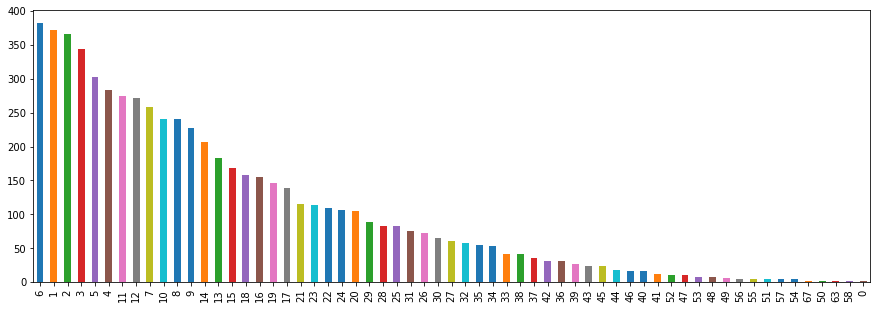

In [952]:
plt.figure(figsize=(15,5))
data['Customer Age'].value_counts().plot.bar()

> With the whole data field, we could divide the customer age to 3 categories based on quantiles : young:(0-7]< mid:(7-16]< old:(16-67]

> The mid group has the highest precetage to churn, next one is old group,then the young group

> qcut:Discretize variable into equal-sized buckets based on rank or based on sample quantiles.

In [ ]:
data['CategoricalAge']= pd.qcut(data['Customer Age'], 3) 
print( data[['CategoricalAge', 'Churn']].groupby(['CategoricalAge'], as_index=False).mean() )

> We could also check the age segmetation in the subset data (Churn==1):(0.999, 12.0] < (12.0, 16.0] < (16.0, 47.0]

> we found month 12 not only occupies large percentage of the customer age,but also is the time most customer choose to churn

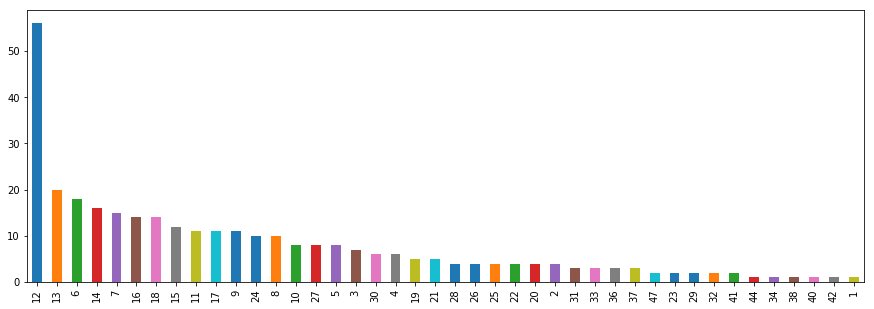

In [953]:
pd.qcut(data[data['Churn']==1]['Customer Age'],3)
plt.figure(figsize=(15,5))
data[data['Churn']==1]['Customer Age'].value_counts().plot.bar()

In [955]:
data[data['Churn']==1]['Customer Age'].value_counts()

12    56
13    20
6     18
14    16
7     15
16    14
18    14
15    12
11    11
17    11
9     11
24    10
8     10
10     8
27     8
5      8
3      7
30     6
4      6
19     5
21     5
28     4
26     4
25     4
22     4
20     4
2      4
31     3
33     3
36     3
37     3
47     2
23     2
29     2
32     2
41     2
44     1
34     1
38     1
40     1
42     1
1      1
Name: Customer Age, dtype: int64

Text(0.5,1,'Customer Age(Churn==1),bins=20')

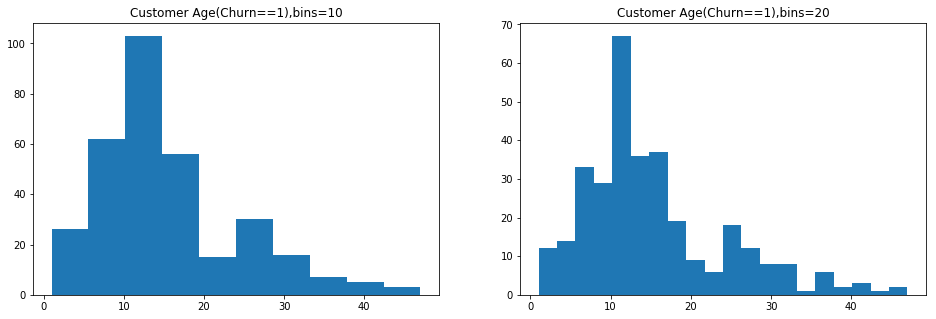

In [957]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize =(16, 5))
ax0.hist(data[data['Churn']==1]['Customer Age'],bins=10)
ax0.set_title('Customer Age(Churn==1),bins=10')
ax1.hist(data[data['Churn']==1]['Customer Age'],bins=20)
ax1.set_title('Customer Age(Churn==1),bins=20')

In [ ]:
From the histogram of those churn==1, we could also see customer age frequency from 6-16 will be high, and low in two tail

In [ ]:
Although, the data( Churn==1) give us different cut, it chosse 12 and 16 months as the division point,we could still use
young (0-7]< mid:(7-16]< old:(16-67] as natural customer segmentation.

In [973]:
print('Young group:',round(data[data['Churn']==1]['Customer Age'].value_counts()[0]/(len(data['Churn']==1)),4))
print('Mid group:',round(data[data['Churn']==1]['Customer Age'].value_counts()[1]/(len(data['Churn']==1)),4))
print('Old group:',round(data[data['Churn']==1]['Customer Age'].value_counts()[2]/(len(data['Churn']==1)),4))

KeyError: 0

In [974]:
data.loc[data['Customer Age']<=7,'Customer Age']                                        = 0
data.loc[(data['Customer Age'] > 7) & (data['Customer Age'] <= 16),'Customer Age']      = 1
data.loc[(data['Customer Age'] > 16) & (data['Customer Age'] <= 67), 'Customer Age']    = 2

In [975]:
data.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,2,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,2,0,0,0,0,0,0.0,0.0,0,0,0,31
3,2,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,2,0,43,-1,0,0,0.0,0.0,0,0,9,31


If we filter data with churn==1 and see the Customer Age distribution,we also get conculsion:mid group has the highest precentage to churn, next one is old group,then the young group

### Compare churn factors between leave and stay costomers (Age: 0-12 ) 

In [976]:
import matplotlib.gridspec as gridspec


# define the figsize of the whole picture
plt.figure(figsize=(20,70)) 

# define the num of columns and rows
gs = gridspec.GridSpec(15,2)
for i,f in enumerate(data[features_name]):
    ax = plt.subplot(gs[i])
    sns.distplot(leave[leave['Customer Age']==0][f],label='Young & Leave')
    sns.distplot(stay[stay['Customer Age']==0][f],label='Young & Stay')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(f))
    plt.legend()

KeyError: "['Last login'] not in index"

### Compare churn factors between leave and stay costomers (Age: 12-16 ) 

In [968]:
import matplotlib.gridspec as gridspec


# define the figsize of the whole picture
plt.figure(figsize=(20,70)) 

# define the num of columns and rows
gs = gridspec.GridSpec(15,2)
for i,f in enumerate(data[features_name]):
    ax = plt.subplot(gs[i])
    sns.distplot(leave[leave['Customer Age']==1][f],label='Young & Leave')
    sns.distplot(stay[stay['Customer Age']==1][f],label='Young & Stay')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(f))
    plt.legend()

KeyError: "['Last login'] not in index"

### Compare churn factors between leave and stay costomers (Age: 16- ) 

In [969]:
import matplotlib.gridspec as gridspec


# define the figsize of the whole picture
plt.figure(figsize=(20,70)) 

# define the num of columns and rows
gs = gridspec.GridSpec(15,2)
for i,f in enumerate(data[features_name]):
    ax = plt.subplot(gs[i])
    sns.distplot(leave[leave['Customer Age']==2][f],label='Young & Leave')
    sns.distplot(stay[stay['Customer Age']==2][f],label='Young & Stay')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(f))
    plt.legend()

KeyError: "['Last login'] not in index"

In [886]:
#[(-0.001, 48.0] < (48.0, 122.0] < (122.0, 298.0]]
#pd.qcut(data['CHI Score Month 0'],3)
data.loc[data['CHI Score Month 0']<=48,'CHI Score Month 0']                                             = 0
data.loc[(data['CHI Score Month 0'] > 48) & (data['CHI Score Month 0'] <= 122),'CHI Score Month 0']     = 1
data.loc[(data['CHI Score Month 0'] > 122) & (data['CHI Score Month 0'] <=298), 'CHI Score Month 0']    = 2

In [887]:
#[(-28322.001, 0.0] < (0.0, 5.0] < (5.0, 230414.0]]
#pd.qcut(data['Views 0-1'],3)
data.loc[data['Views 0-1']<=0,'Views 0-1']                                       = 0
data.loc[(data['Views 0-1'] > 0) & (data['Views 0-1'] <=5),'Views 0-1']          = 1
data.loc[(data['Views 0-1'] > 5) & (data['Views 0-1'] <=230414), 'Views 0-1']    = 2

In [ ]:
data.loc[data.iloc[:,11]<=0,'Last login' ] =0

In [888]:
#[(-648.001, 0.0] < (0.0, 1.0] < (1.0, 61.0]]
#pd.qcut(data.iloc[:,11],3)
data.loc[data.iloc[:,11]<=0,'Last login' ]                               = 0
data.loc[(data.iloc[:,11]> 0) & (data.iloc[:,11]<=1),'Last login' ]      = 1
data.loc[(data.iloc[:,11] > 1) & (data.iloc[:,11]<=61), 'Last login' ]   = 2

In [ ]:
data.head()

In [889]:
leave = data[data['Churn']== 1] 
stay = data[data['Churn']== 0]

In [891]:
data.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Last login
0,2,0,0,0,0,0,0.0,0.0,0,0,0,31,2.0
1,2,0,1,4,0,0,0.0,0.0,0,0,0,31,2.0
2,2,0,0,0,0,0,0.0,0.0,0,0,0,31,2.0
3,2,0,2,1,1,-1,3.0,0.0,167,-8,2,0,0.0
4,2,0,0,-1,0,0,0.0,0.0,0,0,2,31,2.0


In [892]:
y_value=data['Churn']
X_value=data[['Customer Age','CHI Score Month 0','Views 0-1','Last login']]

In [893]:
X_value

,Customer Age,CHI Score Month 0,Views 0-1,Last login
0,2,0,0,2.0
1,2,1,0,2.0
2,2,0,0,2.0
3,2,2,2,0.0
4,2,0,2,2.0
5,2,2,0,0.0
6,2,2,2,0.0
7,2,1,2,2.0
8,2,1,0,2.0
9,2,1,2,2.0


In [894]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X_value, y_value):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X_value.iloc[train_index],X_value.iloc[test_index]
    original_ytrain, original_ytest = y_value.iloc[train_index],y_value.iloc[test_index]
print(original_Xtrain.shape)
print(original_Xtest.shape)
print(original_ytrain.shape)
print(original_ytest.shape)

Train: [ 222 5818 1386 ... 5934 2586  964] Test: [5613  835  701 ... 6005 4180 5870]
Train: [3868 3385 2151 ...  768 2401   46] Test: [3257 5589 3061 ... 4151 3614 2872]
Train: [4613  648 1890 ...  391  845  726] Test: [2069 5692 1455 ...  292 2130  585]
Train: [2629 2215 5580 ... 2198  569 4428] Test: [3896 5910 5820 ... 2619 3354 2280]
Train: [2242 2296 3452 ...  962 5004  642] Test: [1075 2044 5358 ... 5694 1618 1729]
(5077, 4)
(1270, 4)
(5077,)
(1270,)


In [911]:
original_ytest.value_counts()

0    1205
1      65
Name: Churn, dtype: int64

In [895]:
stay = stay.sample(frac=1)
stay_df = stay[:323]
normal_distributed_df = pd.concat([leave, stay_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1,Last login
4002,1,0,0,-15,0,0,0.0,0.0,0,0,0,-15,0.0
1433,2,0,1,10,0,0,0.0,0.0,4,0,0,-30,0.0
4550,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0
4679,0,1,0,0,0,0,0.0,0.0,0,0,0,31,2.0
808,1,1,1,-36,0,0,0.0,0.0,-14,0,0,0,0.0


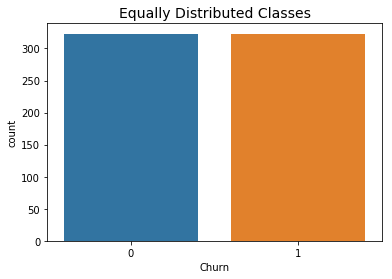

In [896]:
sns.countplot(new_df['Churn'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [897]:
X= new_df[['Customer Age','CHI Score Month 0','Views 0-1','Last login']].values
y=new_df['Churn'].values
X.shape

(646, 4)

In [898]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [828]:
X_test.shape

(259, 4)

In [908]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(original_Xtest)
confusion_matrix(y_pred,original_ytest)

array([[828,  25],
       [377,  40]], dtype=int64)

In [907]:
classification_report(original_ytest, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.97      0.69      0.80      1205\n          1       0.10      0.62      0.17        65\n\navg / total       0.93      0.68      0.77      1270\n'

In [909]:
confusion_matrix(y_pred,original_ytest)

array([[828,  25],
       [377,  40]], dtype=int64)

In [ ]:
precision_score(original_ytest, y_pred, average='weighted') 

In [932]:
from sklearn.metrics import accuracy_score
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(original_Xtest)
confusion_matrix(original_ytest, y_pred)

array([[852, 353],
       [ 22,  43]], dtype=int64)

In [934]:
from sklearn.metrics import accuracy_score
estimator = DecisionTreeClassifier()
estimator.fit(original_Xtrain, original_ytrain)
y_pred = estimator.predict(original_Xtest)
confusion_matrix(original_ytest, y_pred)

array([[1205,    0],
       [  65,    0]], dtype=int64)

In [923]:
undersample_score = accuracy_score(original_ytest, y_pred)
undersample_score

0.7047244094488189

In [930]:
features_name=['Customer Age','CHI Score Month 0','Views 0-1','Last login']
import graphviz 
dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data") 
tree.export_graphviz(estimator, out_file=dot_data,feature_names=features_name,class_names='Churn')
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph1.write_pdf("data.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 0.5\\ngini = 0.5\\nsamples = 387\\nvalue = [190, 197]"] ;\n1 [label="X[0] <= 0.5\\ngini = 0.485\\nsamples = 208\\nvalue = [122, 86]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[2] <= 0.5\\ngini = 0.375\\nsamples = 76\\nvalue = [57, 19]"] ;\n1 -> 2 ;\n3 [label="X[1] <= 1.5\\ngini = 0.325\\nsamples = 49\\nvalue = [39, 10]"] ;\n2 -> 3 ;\n4 [label="X[1] <= 0.5\\ngini = 0.346\\nsamples = 45\\nvalue = [35, 10]"] ;\n3 -> 4 ;\n5 [label="gini = 0.291\\nsamples = 34\\nvalue = [28, 6]"] ;\n4 -> 5 ;\n6 [label="gini = 0.463\\nsamples = 11\\nvalue = [7, 4]"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 4\\nvalue = [4, 0]"] ;\n3 -> 7 ;\n8 [label="X[2] <= 1.5\\ngini = 0.444\\nsamples = 27\\nvalue = [18, 9]"] ;\n2 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n8 -> 9 ;\n10 [label="X[1] <= 0.5\\ngini = 0.375\\nsamples = 24\\nvalue = [18, 6]"] ;\n8 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n10 -> 11 ;\n12 [label="X[1] <= 1.5\\ngini = 0.298\\nsamples = 22\\nvalue = [18, 4]"] ;\n10 -> 12 ;\n13 [label="gini = 0.245\\nsamples = 7\\nvalue = [6, 1]"] ;\n12 -> 13 ;\n14 [label="gini = 0.32\\nsamples = 15\\nvalue = [12, 3]"] ;\n12 -> 14 ;\n15 [label="X[1] <= 1.5\\ngini = 0.5\\nsamples = 132\\nvalue = [65, 67]"] ;\n1 -> 15 ;\n16 [label="X[2] <= 0.5\\ngini = 0.465\\nsamples = 79\\nvalue = [29, 50]"] ;\n15 -> 16 ;\n17 [label="X[1] <= 0.5\\ngini = 0.491\\nsamples = 46\\nvalue = [20, 26]"] ;\n16 -> 17 ;\n18 [label="X[0] <= 1.5\\ngini = 0.415\\nsamples = 17\\nvalue = [5, 12]"] ;\n17 -> 18 ;\n19 [label="gini = 0.42\\nsamples = 10\\nvalue = [3, 7]"] ;\n18 -> 19 ;\n20 [label="gini = 0.408\\nsamples = 7\\nvalue = [2, 5]"] ;\n18 -> 20 ;\n21 [label="X[0] <= 1.5\\ngini = 0.499\\nsamples = 29\\nvalue = [15, 14]"] ;\n17 -> 21 ;\n22 [label="gini = 0.473\\nsamples = 13\\nvalue = [8, 5]"] ;\n21 -> 22 ;\n23 [label="gini = 0.492\\nsamples = 16\\nvalue = [7, 9]"] ;\n21 -> 23 ;\n24 [label="X[1] <= 0.5\\ngini = 0.397\\nsamples = 33\\nvalue = [9, 24]"] ;\n16 -> 24 ;\n25 [label="X[0] <= 1.5\\ngini = 0.245\\nsamples = 7\\nvalue = [1, 6]"] ;\n24 -> 25 ;\n26 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n25 -> 26 ;\n27 [label="gini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n25 -> 27 ;\n28 [label="X[0] <= 1.5\\ngini = 0.426\\nsamples = 26\\nvalue = [8, 18]"] ;\n24 -> 28 ;\n29 [label="X[2] <= 1.5\\ngini = 0.469\\nsamples = 16\\nvalue = [6, 10]"] ;\n28 -> 29 ;\n30 [label="gini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n29 -> 30 ;\n31 [label="gini = 0.459\\nsamples = 14\\nvalue = [5, 9]"] ;\n29 -> 31 ;\n32 [label="X[2] <= 1.5\\ngini = 0.32\\nsamples = 10\\nvalue = [2, 8]"] ;\n28 -> 32 ;\n33 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n32 -> 33 ;\n34 [label="gini = 0.346\\nsamples = 9\\nvalue = [2, 7]"] ;\n32 -> 34 ;\n35 [label="X[0] <= 1.5\\ngini = 0.436\\nsamples = 53\\nvalue = [36, 17]"] ;\n15 -> 35 ;\n36 [label="X[2] <= 1.0\\ngini = 0.49\\nsamples = 28\\nvalue = [16, 12]"] ;\n35 -> 36 ;\n37 [label="gini = 0.498\\nsamples = 15\\nvalue = [8, 7]"] ;\n36 -> 37 ;\n38 [label="gini = 0.473\\nsamples = 13\\nvalue = [8, 5]"] ;\n36 -> 38 ;\n39 [label="X[2] <= 1.0\\ngini = 0.32\\nsamples = 25\\nvalue = [20, 5]"] ;\n35 -> 39 ;\n40 [label="gini = 0.355\\nsamples = 13\\nvalue = [10, 3]"] ;\n39 -> 40 ;\n41 [label="gini = 0.278\\nsamples = 12\\nvalue = [10, 2]"] ;\n39 -> 41 ;\n42 [label="X[1] <= 0.5\\ngini = 0.471\\nsamples = 179\\nvalue = [68, 111]"] ;\n0 -> 42 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n43 [label="X[2] <= 1.5\\ngini = 0.399\\nsamples = 91\\nvalue = [25, 66]"] ;\n42 -> 43 ;\n44 [label="X[2] <= 0.5\\ngini = 0.375\\nsamples = 80\\nvalue = [20, 60]"] ;\n43 -> 44 ;\n45 [label="X[3] <= 1.5\\ngini = 0.394\\nsamples = 74\\nvalue = [20, 54]"] ;\n44 -> 45 ;\n46 [label="gini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n45 -> 46 ;\n47 [label="X[0] <= 1.5\\ngini = 0.389\\nsamples = 72\\nvalue = [19, 53]"] ;\n45 -> 47 ;\n48 [label="X[0] <= 0.5\\ngini = 0.39\\nsamples = 49\\nvalue = [13, 36]"] ;\n47 -> 48 ;\n49 [label="gini = 0.391\\nsamples = 15\\nvalue = [4, 11]"] ;\n48 -> 49 ;\n50 [label="gini = 0.389\\nsamples = 34\\nvalue = [9, 25]"] ;\n48 -> 50 ;\n51 [label="gini = 0.386\\nsamples = 23\\nvalue = [6, 17]"] ;\n47 -> 51 ;\n52 [label="gini = 0.0\\nsamples = 6\\nvalue = [0, 6]"] ;\n44 -> 52 ;\n53 [label="X[0] <= 0.5\\ngini = 0.496\\nsamples = 11\\nvalue = [5, 6]"] ;\n43 -> 53 ;\n54 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n53 -> 54 ;\n55 [label="X[0] <= 1.5\\ngini = 0.469\\nsamples = 8\\nvalue = [5, 3]"] ;\n53 -> 55 ;\n56 [label="gini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n55 -> 56 ;\n57 [label="gini = 0.444\\nsamples = 6\\nvalue = [4, 2]"] ;\n55 -> 57 ;\n58 [label="X[0] <= 1.5\\ngini = 0.5\\nsamples = 88\\nvalue = [43, 45]"] ;\n42 -> 58 ;\n59 [label="X[2] <= 1.5\\ngini = 0.487\\nsamples = 55\\nvalue = [23, 32]"] ;\n58 -> 59 ;\n60 [label="X[3] <= 1.5\\ngini = 0.444\\nsamples = 27\\nvalue = [9, 18]"] ;\n59 -> 60 ;\n61 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n60 -> 61 ;\n62 [label="X[1] <= 1.5\\ngini = 0.453\\nsamples = 26\\nvalue = [9, 17]"] ;\n60 -> 62 ;\n63 [label="X[0] <= 0.5\\ngini = 0.472\\nsamples = 21\\nvalue = [8, 13]"] ;\n62 -> 63 ;\n64 [label="X[2] <= 0.5\\ngini = 0.49\\nsamples = 7\\nvalue = [3, 4]"] ;\n63 -> 64 ;\n65 [label="gini = 0.5\\nsamples = 6\\nvalue = [3, 3]"] ;\n64 -> 65 ;\n66 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n64 -> 66 ;\n67 [label="X[2] <= 0.5\\ngini = 0.459\\nsamples = 14\\nvalue = [5, 9]"] ;\n63 -> 67 ;\n68 [label="gini = 0.444\\nsamples = 12\\nvalue = [4, 8]"] ;\n67 -> 68 ;\n69 [label="gini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n67 -> 69 ;\n70 [label="gini = 0.32\\nsamples = 5\\nvalue = [1, 4]"] ;\n62 -> 70 ;\n71 [label="X[0] <= 0.5\\ngini = 0.5\\nsamples = 28\\nvalue = [14, 14]"] ;\n59 -> 71 ;\n72 [label="gini = 0.444\\nsamples = 6\\nvalue = [4, 2]"] ;\n71 -> 72 ;\n73 [label="X[3] <= 1.5\\ngini = 0.496\\nsamples = 22\\nvalue = [10, 12]"] ;\n71 -> 73 ;\n74 [label="X[1] <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]"] ;\n73 -> 74 ;\n75 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n74 -> 75 ;\n76 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n74 -> 76 ;\n77 [label="X[1] <= 1.5\\ngini = 0.499\\nsamples = 19\\nvalue = [9, 10]"] ;\n73 -> 77 ;\n78 [label="gini = 0.5\\nsamples = 12\\nvalue = [6, 6]"] ;\n77 -> 78 ;\n79 [label="gini = 0.49\\nsamples = 7\\nvalue = [3, 4]"] ;\n77 -> 79 ;\n80 [label="X[3] <= 1.5\\ngini = 0.478\\nsamples = 33\\nvalue = [20, 13]"] ;\n58 -> 80 ;\n81 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n80 -> 81 ;\n82 [label="X[1] <= 1.5\\ngini = 0.482\\nsamples = 32\\nvalue = [19, 13]"] ;\n80 -> 82 ;\n83 [label="X[2] <= 0.5\\ngini = 0.477\\nsamples = 28\\nvalue = [17, 11]"] ;\n82 -> 83 ;\n84 [label="gini = 0.444\\nsamples = 18\\nvalue = [12, 6]"] ;\n83 -> 84 ;\n85 [label="X[2] <= 1.5\\ngini = 0.5\\nsamples = 10\\nvalue = [5, 5]"] ;\n83 -> 85 ;\n86 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n85 -> 86 ;\n87 [label="gini = 0.494\\nsamples = 9\\nvalue = [5, 4]"] ;\n85 -> 87 ;\n88 [label="X[2] <= 1.0\\ngini = 0.5\\nsamples = 4\\nvalue = [2, 2]"] ;\n82 -> 88 ;\n89 [label="gini = 0.444\\nsamples = 3\\nvalue = [1, 2]"] ;\n88 -> 89 ;\n90 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n88 -> 90 ;\n}'